In [2]:
import pandas as pd 
import geopandas as gpd

In [3]:
dir = "/Users/anfelipecb/Library/CloudStorage/GoogleDrive-afcamachob@uchicago.edu/My Drive/CS30122/Final project/30122-project-treehuggers/data/yelp/yelp_cleaned.json"

In [4]:
yelp_data = pd.read_json(dir)

In [5]:
yelp_data

,name,rating,review_count,latitude,longitude,location
0,Garfield Park Conservatory,4.8,795,41.886496,-87.717822,"{'address1': '300 N Central Park Ave', 'addres..."
1,Millennium Park,4.6,1455,41.882557,-87.622552,"{'address1': '201 E Randolph St', 'address2': ..."
2,Humboldt Park,4.4,136,41.905754,-87.702181,"{'address1': '1400 N Sacramento Ave', 'address..."
3,Lincoln Park Conservatory,4.6,304,41.924335,-87.635218,"{'address1': '2391 N Stockton Dr', 'address2':..."
4,The 606 - Bloomingdale Trail,4.2,175,41.914277,-87.668956,"{'address1': '1600-3700 W Bloomingdale', 'addr..."
...,...,...,...,...,...,...
235,Margeret T Burroughs Beach,4.0,1,41.839286,-87.606718,"{'address1': '3100 S Lake Shore Dr', 'address2..."
236,Dog Pub,0.0,0,41.980999,-87.676031,"{'address1': '5435 N Wolcott Ave', 'address2':..."
237,Lakefront Park,0.0,0,41.900287,-87.623386,"{'address1': '100 E Lake Shore Dr', 'address2'..."
238,Indiana & 16th Dog Park,3.3,6,41.860250,-87.622380,"{'address1': 'S Indiana Ave & E 16th St', 'add..."


In [6]:
gdf = gpd.GeoDataFrame(yelp_data, 
                       geometry = gpd.points_from_xy(yelp_data.longitude, yelp_data.latitude,  crs = "EPSG:4326"))

In [10]:
gdf

,name,rating,review_count,latitude,longitude,location,geometry
0,Garfield Park Conservatory,4.8,795,41.886496,-87.717822,"{'address1': '300 N Central Park Ave', 'addres...",POINT (-87.71782 41.8865)
1,Millennium Park,4.6,1455,41.882557,-87.622552,"{'address1': '201 E Randolph St', 'address2': ...",POINT (-87.62255 41.88256)
2,Humboldt Park,4.4,136,41.905754,-87.702181,"{'address1': '1400 N Sacramento Ave', 'address...",POINT (-87.70218 41.90575)
3,Lincoln Park Conservatory,4.6,304,41.924335,-87.635218,"{'address1': '2391 N Stockton Dr', 'address2':...",POINT (-87.63522 41.92434)
4,The 606 - Bloomingdale Trail,4.2,175,41.914277,-87.668956,"{'address1': '1600-3700 W Bloomingdale', 'addr...",POINT (-87.66896 41.91428)
...,...,...,...,...,...,...,...
235,Margeret T Burroughs Beach,4.0,1,41.839286,-87.606718,"{'address1': '3100 S Lake Shore Dr', 'address2...",POINT (-87.60672 41.83929)
236,Dog Pub,0.0,0,41.980999,-87.676031,"{'address1': '5435 N Wolcott Ave', 'address2':...",POINT (-87.67603 41.981)
237,Lakefront Park,0.0,0,41.900287,-87.623386,"{'address1': '100 E Lake Shore Dr', 'address2'...",POINT (-87.62339 41.90029)
238,Indiana & 16th Dog Park,3.3,6,41.860250,-87.622380,"{'address1': 'S Indiana Ave & E 16th St', 'add...",POINT (-87.62238 41.86025)


<Axes: >

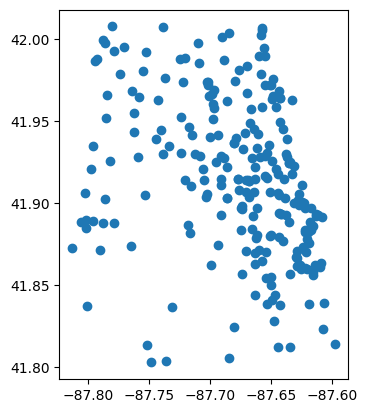

In [7]:
gdf.plot()

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt


place_name = "Chicago, Illinois, USA"
tags = {"leisure": "park"}

parks = ox.features_from_place(place_name, tags=tags)
parks = parks.to_crs(epsg=4326)

In [10]:
from keplergl import KeplerGl

In [13]:
config = {
    "version": "v1", 
    "config" : {
        "mapSatate": {
            "latitude": 41.8781,
            "longitude": -87.8298,
            "zoom": 10
        }
    }
}

kepler_map = KeplerGl(height=600, config = config)
kepler_map.add_data(data=parks, name="Chicago Parks")
kepler_map.add_data(data= yelp_data, name ="Yelp Reviews")

kepler_map.save_to_html(file_name='chicago_parks_kepler.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to chicago_parks_kepler.html!


/Users/anfelipecb/Library/CloudStorage/GoogleDrive-afcamachob@uchicago.edu/My Drive/CS30122/Final project/30122-project-treehuggers/.venv/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
/Users/anfelipecb/Library/CloudStorage/GoogleDrive-afcamachob@uchicago.edu/My Drive/CS30122/Final project/30122-project-treehuggers/.venv/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)
